# Lead Scoring Case Study

### Problem Statement

The X Education sells online courses to industry professionals. For any day, many people who are keen on the courses visit the website, browse for courses and become future prospective customers. There are a many leads generated in the initial stage but only a portion of them come out as paying customers. The company requires building a model whereas you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The company needs to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc.) in order to get a higher lead conversion. <br>

The problem is to assist the comapany identify the most promising leads, or the leads that are most likely to convert into paying customers. Therefore, the CEO has provided a ballpark of the target lead conversion rate to be around **80%**.

#### Data
Leads.csv : The dataset consists of 37 data fields including Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which might later turn out to become predictor deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.
The detailed columns list is shown as below: <br>
1) Lead Number - A lead number assigned to each lead procured. <br>
2) Lead Origin - The origin identifier with which the customer was identified to be a lead, namely API, Landing Page Submission, etc. <br>
3) Lead Source - The source of the lead, namely Google, Organic Search, etc. <br>
4) Do Not Email -An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not. <br>
5) Do Not Call - An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not. <br>
6) Converted - The target variable indicates whether a lead has been successfully converted or not. <br>
7) TotalVisits - The total number of visits made by the customer on the website. <br>
8) Total Time Spent on Website - The total time spent by the customer on the website. <br>
9) Page Views Per Visit - Average number of pages on the website viewed during the visits. <br>
10) Last Activity - Last activity performed by the customer, namely Email Opened, Olark Chat Conversation, etc. <br>
11) Country - The country of the customer. <br>
12) Specialization - The industry domain in which the customer worked before, including the level 'Select Specialization' which means the customer had not selected this option while filling the form. <br>
13) How did you hear about X Education - The source from which the customer heard about X Education. <br>
14) What is your current occupation - Implies whether the customer is a student, umemployed or employed. <br>
15) What matters most to you in choosing this course An option selected by the customer - indicating what is their main motto behind doing this course. <br>
16) Search - showing whether the customer had seen the ad in any of the listed items. <br>
17) Magazine <br>
18) Newspaper Article <br>
19) X Education Forums <br>
20) Newspaper <br>
21) Digital Advertisement <br>
22) Through Recommendations - showing whether the customer came in through recommendations. <br>
23) Receive More Updates About Our Courses - showing whether the customer chose to receive more updates about the courses. <br>
24) Tags - assigned to customers indicating the current status of the lead. <br>
25) Lead Quality - showing the quality of lead based on the data & intuition the employee who has been assigned to the lead. <br>
26) Update me on Supply Chain Content - showing whether the customer wants updates on the Supply Chain Content. <br>
27) Get updates on DM Content - showing whether the customer wants updates on the DM Content. <br>
28) Lead Profile - A lead level assigned to each customer based on their profile. <br>
29) City - The city of the customer. <br>
30) Asymmetric Activity Index - An index and score assigned to each customer based on their activity and their profile <br>
31) Asymmetric Profile Index <br>
32) Asymmetric Activity Score <br>
33) Asymmetric Profile Score <br>
34) I agree to pay the amount through cheque - showing whether the customer has agreed to pay the amount through cheque or not. <br>
35) a free copy of Mastering The Interview - showing whether the customer wants a free copy of 'Mastering the Interview' or not. <br>
36) Last Notable Activity - The last notable activity performed by the student. <br>
37) Prospect ID - A unique ID with which the customer is identified. <br>

-----------

In [1]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore') # Suppress warnings

### Reading and Understanding the Data

In [3]:
df_leads = pd.read_csv('Leads.csv') # Import the input data
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Data Inspection

In [4]:
df_leads.shape # Examine the data shape/dimensionality

(9240, 37)

In [5]:
df_leads.describe() # Gain the first impression of data distributions

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
df_leads.info() # Checking on data type and potential null errors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Cross checked the data types of variables with the data dictionary. All variables have proper data types.

### Data Cleaning

In [7]:
df_leads.loc[df_leads.duplicated()] # Check for duplicates

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


No duplicates detected in the input data.

Remove the ID distinctive columns from model building dataset as they are redundant to lighter the training data.

In [8]:
df_leads = df_leads.drop(['Lead Number','Prospect ID'], 1)

In [9]:
df_leads = df_leads.replace('Select', np.nan) # Alter 'Select' values with Nan

In [10]:
round(100 * (df_leads.isnull().sum() / len(df_leads.index)), 2) # Derive for portion of null values for all columns

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
df_leads.isnull().sum() # Further check for count of missing values in each column

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

Ideally, we'll drop columns with more than 40% of missing values as they turn out to be incomplete. 
However, the 5 variables 'Lead Quality' , 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score' might need some further exploration.

In [12]:
# To drop columns with more than 40% of missing values except for 5 aforementioned variables
df_leads = df_leads.drop(df_leads.loc[:,list(round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2) > 52)].columns, 1)

In the next step, we will work on column by column, in which: <br>
- For categorical variables, we'll analyse the count/percentage plots.
- For numerical variable, we'll describe the variable and analyse the box plots.

In [13]:
# Function for percentage plots
def percent_plot(var):
    values = (df_leads[var].value_counts(normalize = True) * 100)
    plt_p = values.plot.bar(color = sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

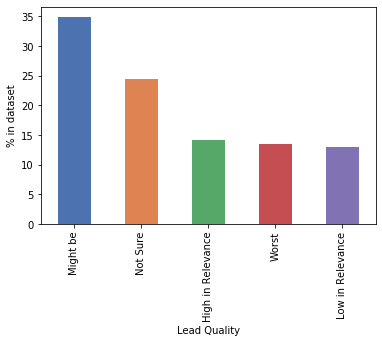

In [14]:
# For Lead Quality
percent_plot('Lead Quality')

Given the underlying values of column 'Lead Quality' looks like questionaire in nature, it is proposed that the null values to be imputed with the value 'Not Sure' as we can assume that not filling in a column shows that the employee is not sure about the option.

In [15]:
df_leads['Lead Quality'] = df_leads['Lead Quality'].replace(np.nan, 'Not Sure')

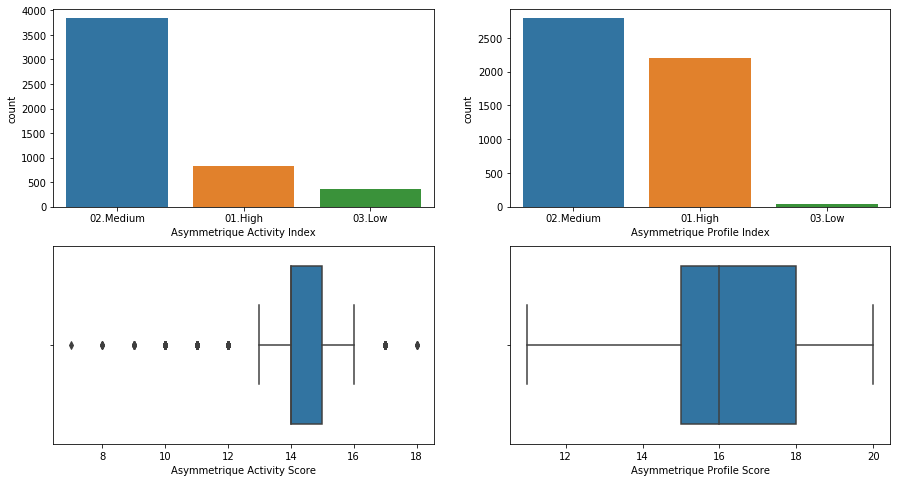

In [16]:
# Further check for 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
asym_list = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
plt.figure(figsize = (15, 8))
for var in asym_list:
    plt.subplot(2, 2, asym_list.index(var) + 1)
    if 'Index' in var:
        sns.countplot(df_leads[var])
    else:
        sns.boxplot(df_leads[var])
plt.show()

In [17]:
df_leads[asym_list].describe() # Check on distributions of numerical variables

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
max,18.000000,20.000000


In [22]:
from scipy.stats import skew
from scipy.stats import kurtosis

print(df_leads[asym_list].skew(axis = 0, skipna = True))
print(df_leads[asym_list].kurtosis(axis = 0, skipna = True))

Asymmetrique Activity Score   -0.383380
Asymmetrique Profile Score     0.221739
dtype: float64
Asymmetrique Activity Score    1.233086
Asymmetrique Profile Score    -0.619731
dtype: float64


It is observed in chunk 10 that these four variables have more than 45% missing values For numerical variables of Activity Score and Profile Score, it seems that Activity Score is right skewed while Profile Score is left skewed and both are not really in balanced distribution. Given the high portion of missing values, it is proposed to drop all these 4 columns.

In [23]:
df_leads = df_leads.drop(asym_list, 1)

<b><font color= green size =3>Imbalanced Variables</font></b>

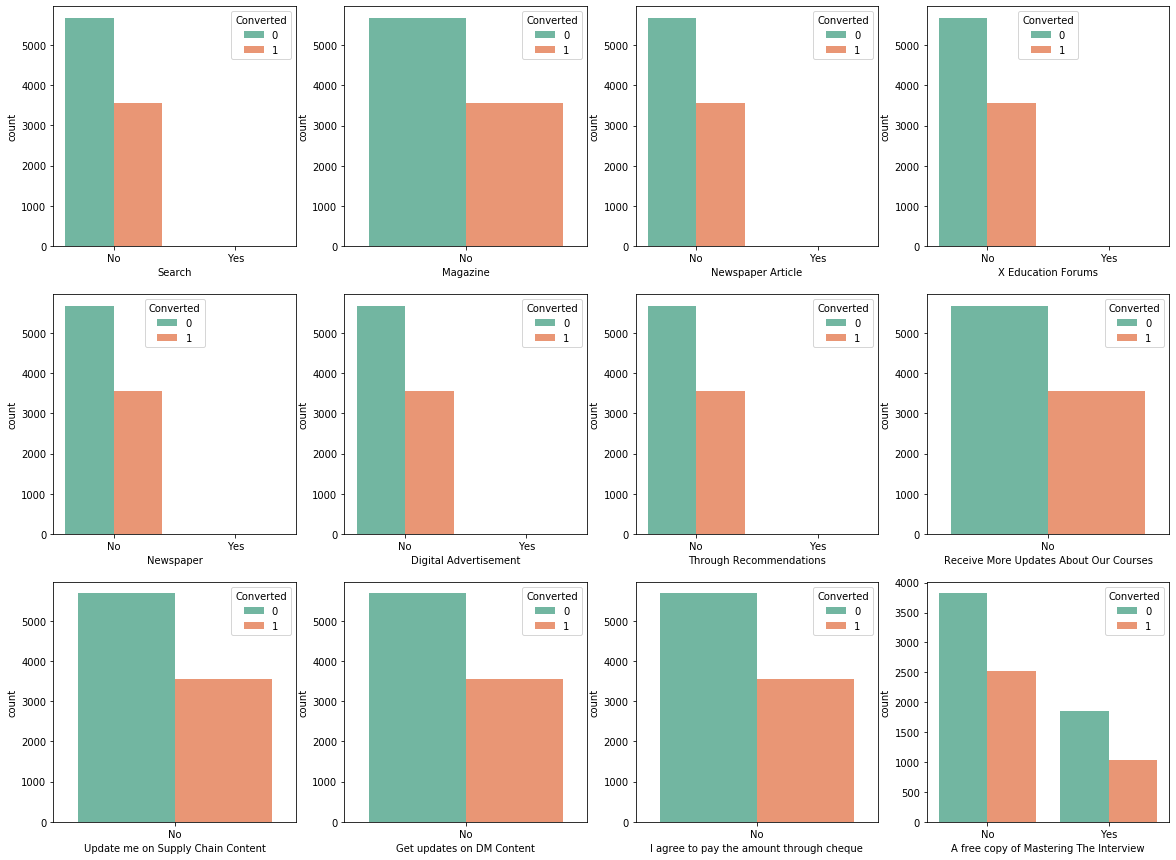

In [25]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(3, 4, figsize = (20, 15))
sns.countplot(x = "Search", hue = "Converted", data = df_leads, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Magazine", hue = "Converted", data = df_leads, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df_leads, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "X Education Forums", hue = "Converted", data = df_leads, ax = axs[0,3],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data = df_leads, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df_leads, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df_leads, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df_leads, ax = axs[1,3],palette = 'Set2')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =df_leads, ax = axs[2,0],palette = 'Set2')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df_leads, ax = axs[2,1],palette = 'Set2')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df_leads, ax = axs[2,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df_leads, ax = axs[2,3],palette = 'Set2')
plt.show()

<b><font size= 3> Observations </font></b><br><ul><li> For all listed columns above, except for 'A free copy of Mastering The Interview' input data is highly imbalanced, therefore, it is proposed to drop them</li><li> "A free copy of Mastering The Interview" is also redundant variable and will be dropped.</li>

In [27]:
# Create a list of columns to be dropped
cols_to_drop=(['Search'
               , 'Magazine'
               , 'Newspaper Article'
               , 'X Education Forums'
               , 'Newspaper'
               , 'Digital Advertisement'
               , 'Through Recommendations'
               , 'Receive More Updates About Our Courses'
               , 'Update me on Supply Chain Content'
               , 'Get updates on DM Content'
               , 'I agree to pay the amount through cheque'
               , 'A free copy of Mastering The Interview'])
df_leads = df_leads.drop(cols_to_drop, 1)

In [28]:
round(100 * (df_leads.isnull().sum() / len(df_leads.index)), 2) # Recheck the percentage of null values in each column

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                      0.00
City                                             39.71
Last Notable Activity                             0.00
dtype: float64

In this next step, let examine each missing value column to make imputation decision. We will start first with column 'City', which has the highest portion of missing value (e.g., around 39.71%).

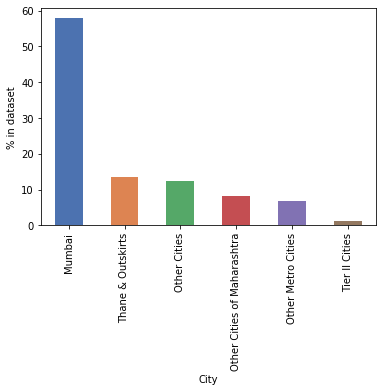

In [29]:
# For 'City'
percent_plot('City')

About 60% of the City values are Mumbai dominantly, therefore we can impute 'Mumbai' in the missing values. 

In [30]:
df_leads['City'] = df_leads['City'].replace(np.nan, 'Mumbai')

The next column to check is 'Specialization'.

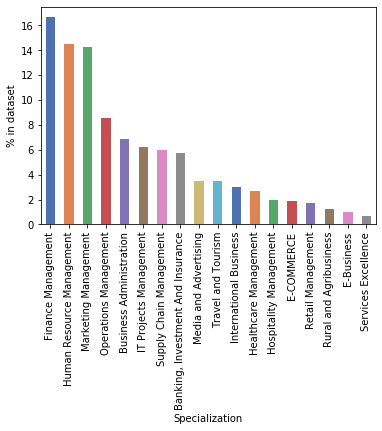

In [31]:
# For 'Specialization'
percent_plot('Specialization')

There are a lot of different values of specialization and imputation as mode is not an ideal choice for such high frequency column. However, it is still possible that a person does not have a specialization or not listed in the provision.

In [32]:
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Others')

Let now examine the categorical variables of 'Tags', 'What matters most to you in choosing a course', 'What is your current occupation' and 'Country' concurrently.

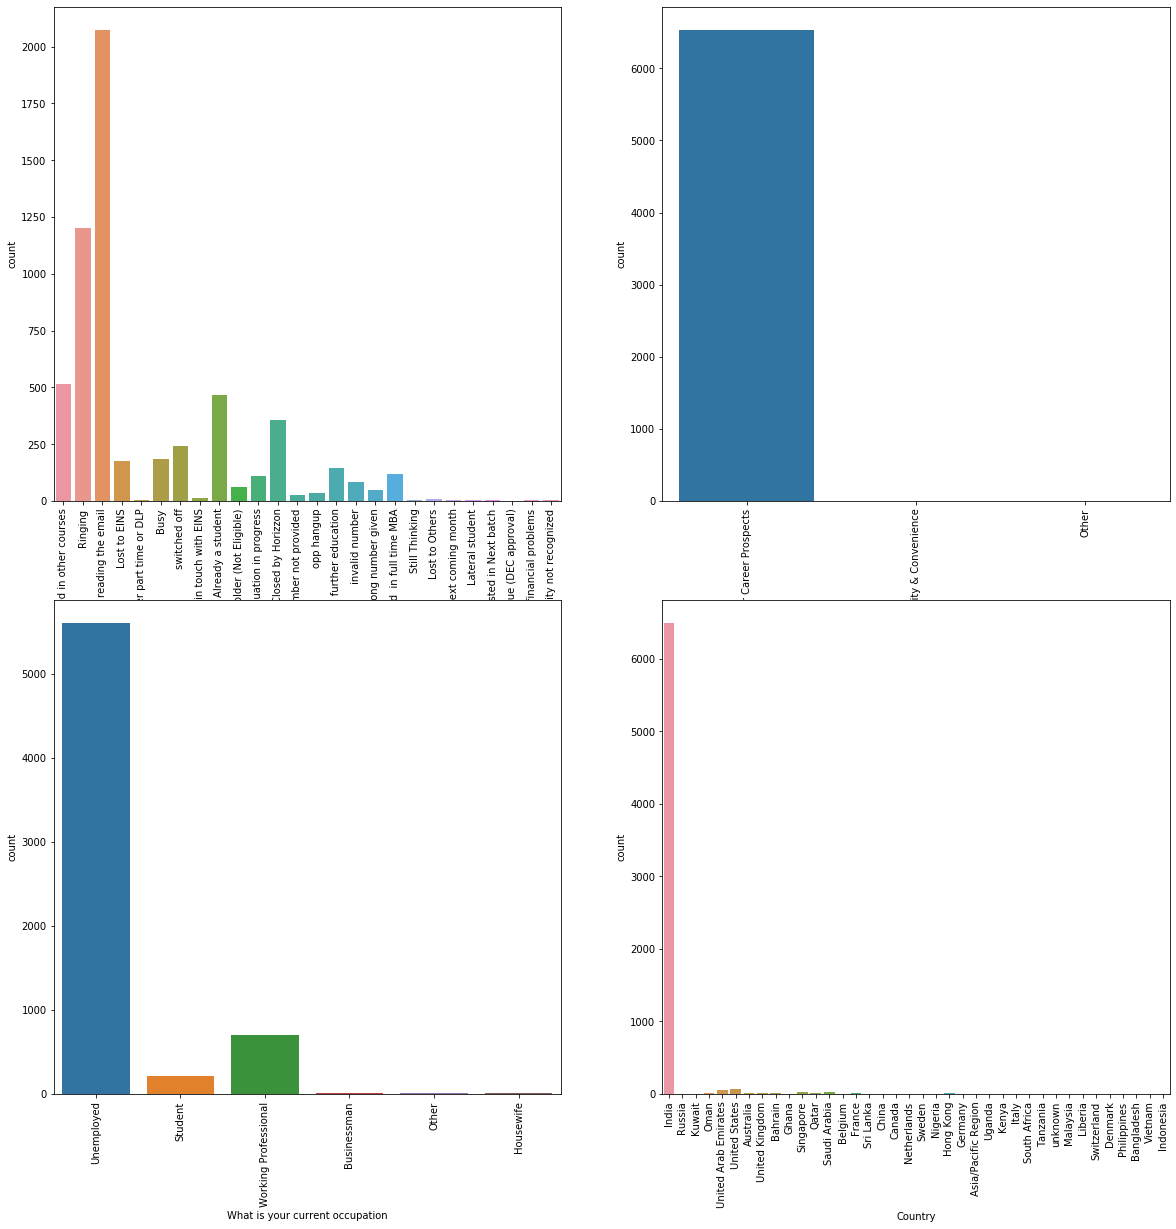

In [52]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Create percent plots in each subplot
sns.countplot(data = df_leads, x = 'Tags', ax=axes[0, 0]).set_xticklabels(sns.countplot(data = df_leads, x = 'Tags', ax=axes[0, 0]).get_xticklabels(), rotation = 90)
sns.countplot(data = df_leads, x = 'What matters most to you in choosing a course', ax=axes[0, 1]).set_xticklabels(sns.countplot(data = df_leads, x = 'What matters most to you in choosing a course', ax=axes[0, 1]).get_xticklabels(), rotation = 90)
sns.countplot(data = df_leads, x = 'What is your current occupation', ax=axes[1, 0]).set_xticklabels(sns.countplot(data = df_leads, x = 'What is your current occupation', ax=axes[1, 0]).get_xticklabels(), rotation = 90)
sns.countplot(data = df_leads, x = 'Country', ax=axes[1, 1]).set_xticklabels(sns.countplot(data = df_leads, x = 'Country', ax=axes[1, 1]).get_xticklabels(), rotation = 90)

plt.show()

<b><font size= 3> Observations </font></b><br><ul><li>
In all these categorical variables, there's always one dominant value, which is clearly much more frequent than all others. So it makes sense to impute with the most frequent values.

In [53]:
# To impute with the most frequent value
var_list = ['Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country']

for var in var_list:
    top_frequent = df_leads[var].describe()['top']
    df_leads[var] = df_leads[var].replace(np.nan, top_frequent)

In [54]:
round(100*(df_leads.isnull().sum() / len(df_leads.index)), 2) # To get percentage of null values in each column

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Tags                                             0.00
Lead Quality                                     0.00
City                                             0.00
Last Notable Activity                            0.00
dtype: float64

Now let have a closer look at the two variables having 1.48% missing values, which are TotalVisits and Page Views Per Visit.

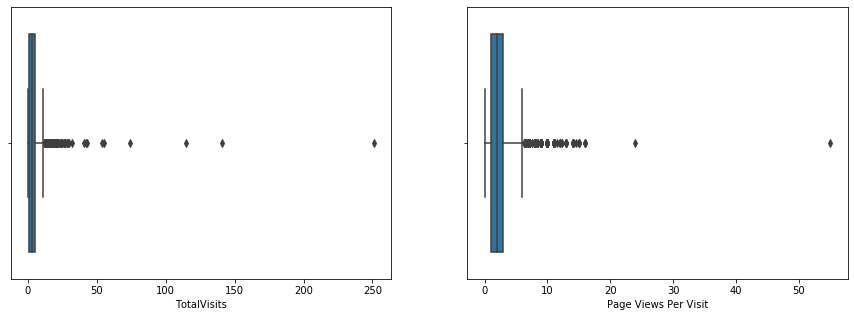

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [56]:
# 'TotalVisits' and 'Page Views Per Visit' numerical variable checks
visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize=(15, 5))
for var in visit_list:
    plt.subplot(1,2,visit_list.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()

df_leads[visit_list].describe()

From the above analysis, it can be seen that there are quite many outliers in both of the variables. As there are only less than 1.5% missing values, it is proposed to remove the records having missing values. 

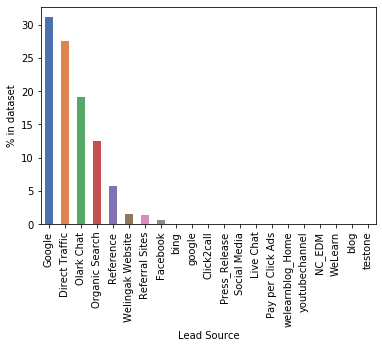

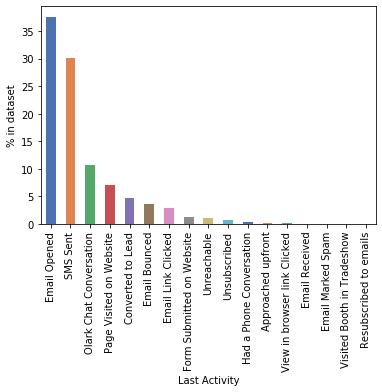

In [64]:
# For 'Lead Source' and 'Last Activity'
var_list = ['Lead Source', 'Last Activity']

for var in var_list:
    percent_plot(var)
    plt.show()

In these categorical variables, imputing with the mode value is not accurate without the presence of dominant frequency. Also, as these variables have very little missing values, it is better to drop the rows containing these missing values. Hence, we'll drop the rows containing any missing missing values for above four variables.

In [65]:
df_leads.dropna(inplace = True) # To drop the rows containing missing values

In [66]:
round(100 * (df_leads.isnull().sum() / len(df_leads.index)), 2) # To get percentage of null values in each column

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Tags                                             0.0
Lead Quality                                     0.0
City                                             0.0
Last Notable Activity                            0.0
dtype: float64

There are no more missing values, let now move to the next step.

### <font color =blue> Numerical Attributes Analysis:</font>

37.85541106458012


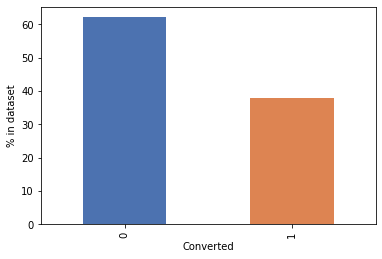

In [68]:
percent_plot('Converted') # Barplot for the target variable 'Converted'
print((sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100) # check for current average conversion rate (e.g., 38%)

#### Visualising Numerical Variables and Outlier Treatment

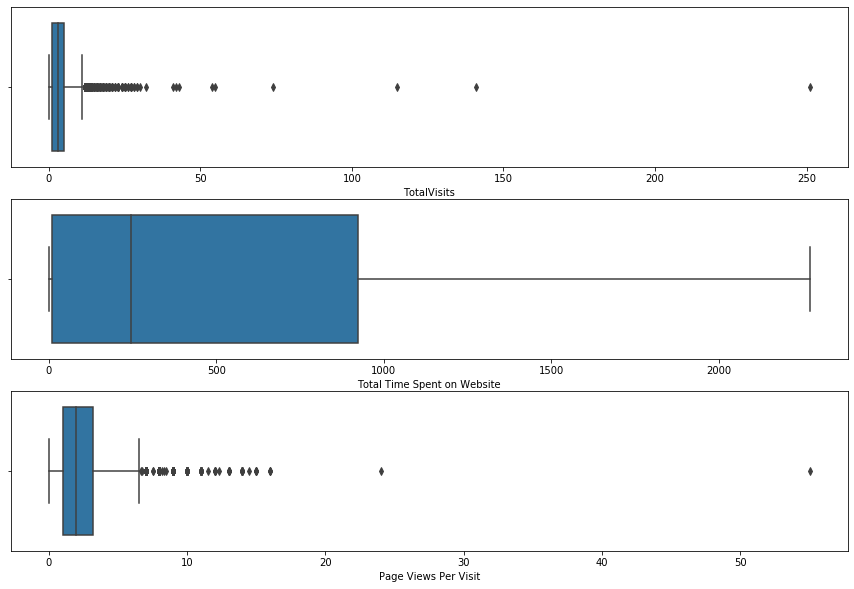

In [69]:
# Boxplots
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize = (15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()

In [70]:
df_leads[num_var].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


From the boxplots and whiskers, it is observed that there are outliers presented in the variables.
- For 'TotalVisits' and 'Page Views Per Visit', the 95% quantile is far below the maximum level. Hence, it is proposed to right censor the data above 10 to remove data noise.
- There are no significant outliers in 'Total Time Spent on Website'
<br>

In [71]:
# Outlier treatment
percentile = df_leads['TotalVisits'].quantile([0.95]).values
df_leads['TotalVisits'][df_leads['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = df_leads['Page Views Per Visit'].quantile([0.95]).values
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit'] >= percentile[0]] = percentile[0]

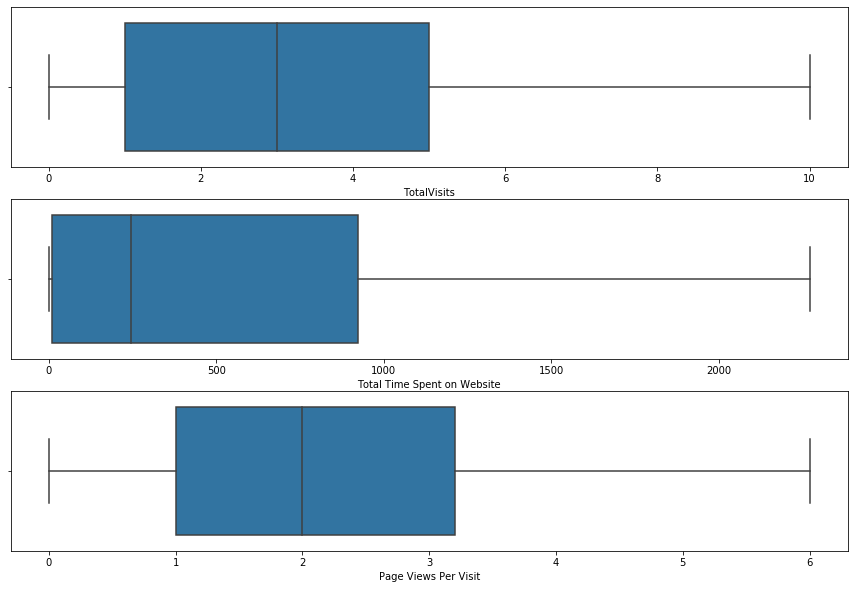

In [73]:
# Plot Boxplots to recheck after censoring with more reasonable look now
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()

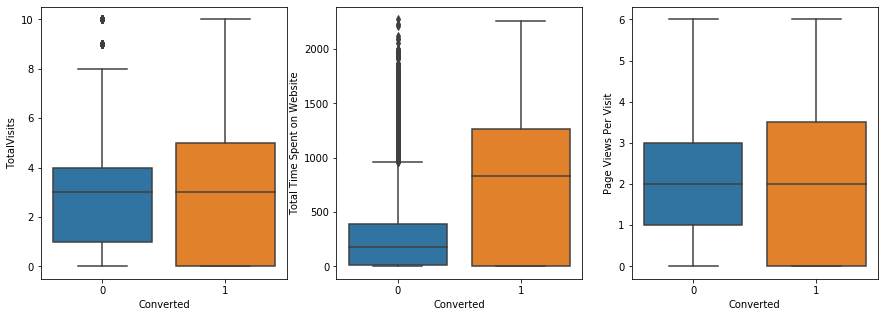

In [74]:
# Plot numerical variables against target variable to look for further relations
plt.figure(figsize=(15, 5))
for var in num_var:
    plt.subplot(1, 3, num_var.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = df_leads)
plt.show()

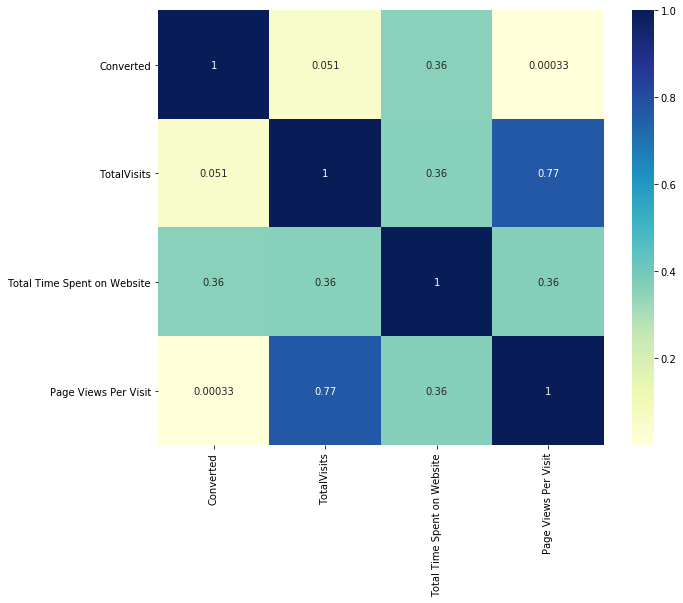

In [75]:
#Checking correlations of numeric values using heatmap
plt.figure(figsize = (10,8))
sns.heatmap(df_leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

<b><font size= 3> Observations </font></b><br><ul><li>
- 'TotalVisits' has same median values for both outputs of leads. No conclusion can be drwan from this.
- People spending more time on the website are more likely to be converted with also highest correlation coefficient, which is very comprehensive.
- 'Page Views Per Visit' also has same median values for both outputs of leads, but having quite low highest correlation coefficient with the target variable.

#### Visualising Categorical Variables

In [76]:
# List out categorical variables
cat_var = list(df_leads.columns[df_leads.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [77]:
# Functions to plot countplots for categorical variables with target variable

# For single plot
def plot_cat_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = "Converted", data = df_leads)
    plt.xticks(rotation = 90)
    plt.show()

# For multiple plots    
def plot_cat_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = "Converted", data = df_leads)
        plt.xticks(rotation = 90)
    plt.show()

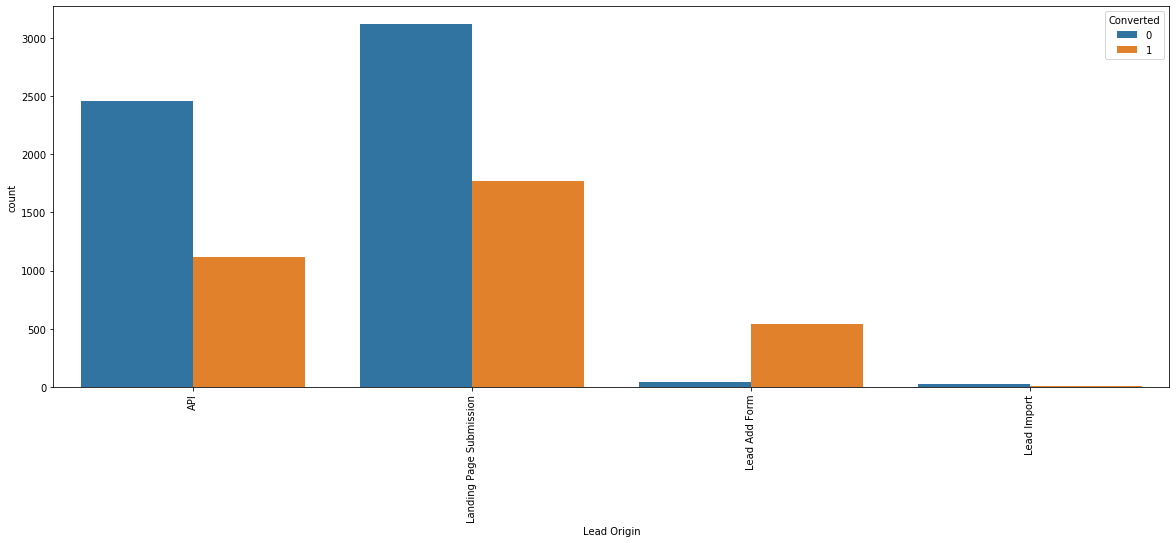

In [78]:
plot_cat_var(cat_var[0])

Observations for **Lead Origin** : <br>
'API' and 'Landing Page Submission' generate the most leads but have less conversion rates of around 30%. Whereas, 'Lead Add Form' generates less leads but conversion rate is great. We should **try to increase conversion rate for 'API' and 'Landing Page Submission', and increase leads generation using 'Lead Add Form'** while 'Lead Import' is very immaterial.

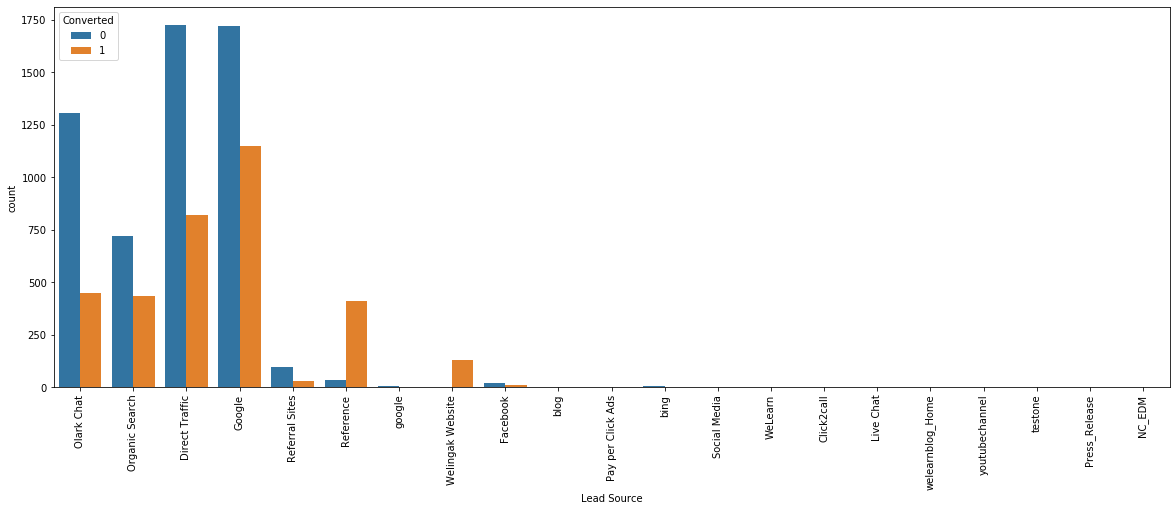

In [79]:
plot_cat_var(cat_var[1])

Observations for **Lead Source** : <br>
- Needs to merge 'google' with 'Google'
- As it can be seen from the graph, number of leads generated by many of the sources are negligible. There are sufficient numbers till Facebook. We can convert all others in one single category of 'Others'.
- 'Direct Traffic' and 'Google' generate maximum number of leads while maximum conversion rate is achieved through 'Reference' and 'Welingak Website'.

In [81]:
# Merge 'google' with 'Google'
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['google'], 'Google')
df_leads['Lead Source'].unique() # recheck on merging

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

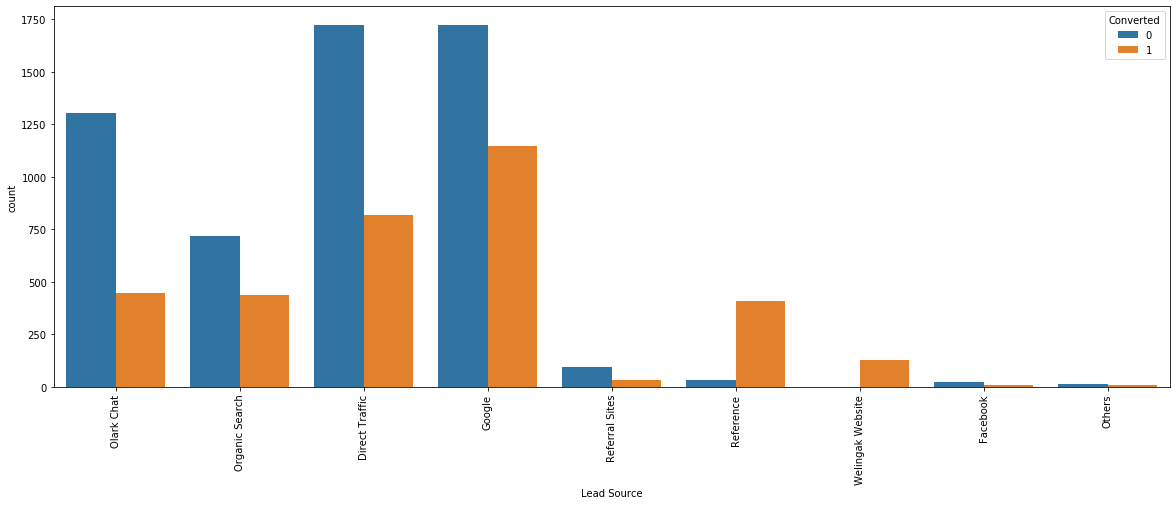

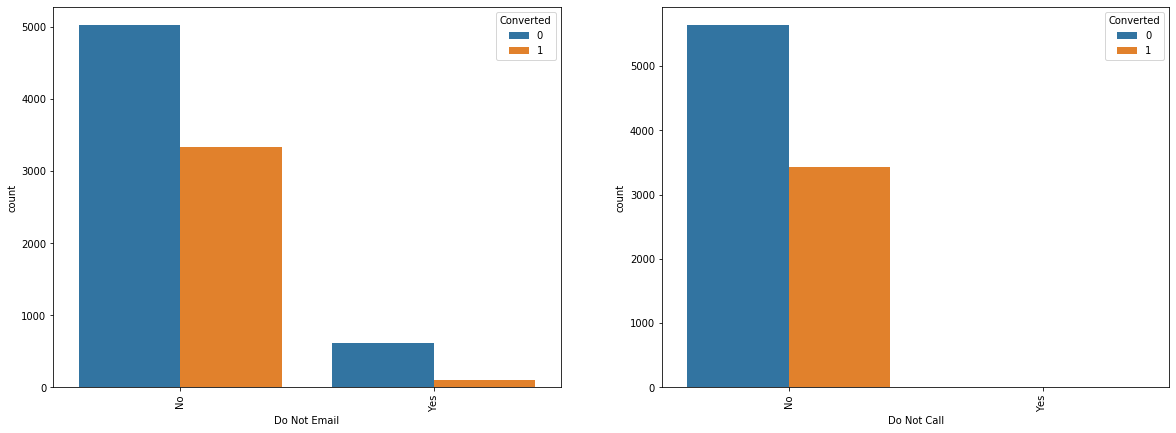

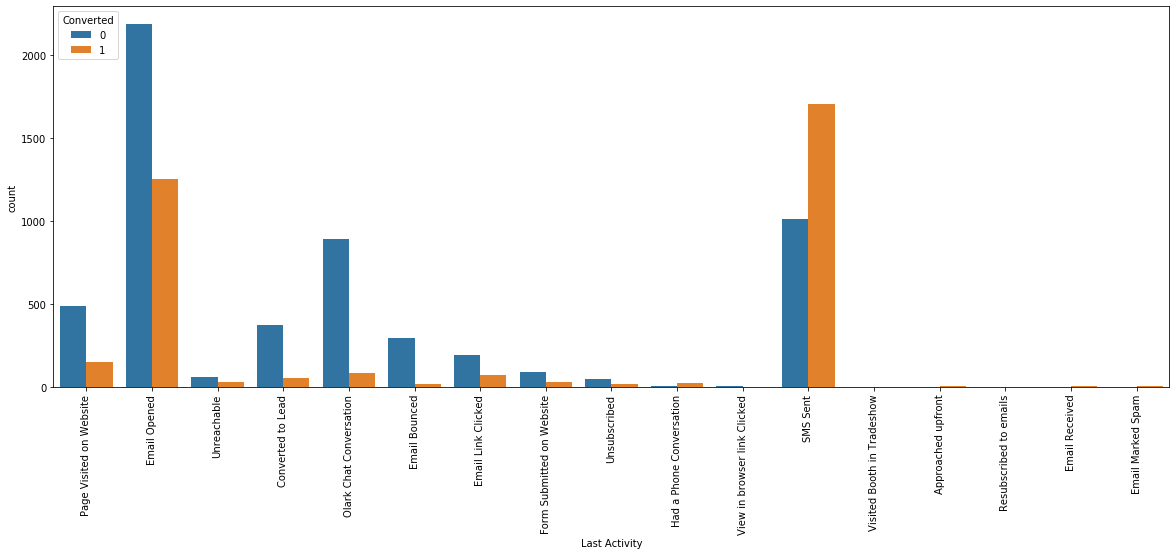

In [86]:
# Censor data for immmaterial categories
categories = df_leads['Lead Source'].unique()
df_leads['Lead Source'] = df_leads['Lead Source'].replace(categories[8:], 'Others')
plot_cat_var(cat_var[1])
plot_cat_vars([cat_var[2],cat_var[3]])
plot_cat_var(cat_var[4])

In [91]:
categories = df_leads['Last Activity'].unique()
print(categories)
df_leads['Last Activity'] = df_leads['Last Activity'].replace(categories[-5:], 'Others')

['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Others']


We can remove the last five categories of Last Activity to reduce data frequency

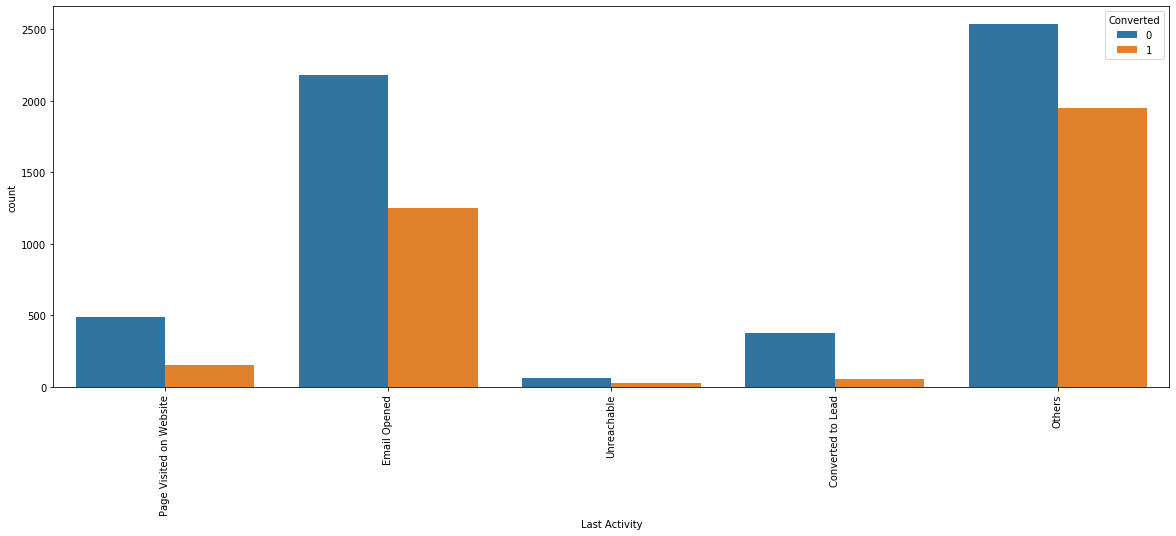

In [92]:
plot_cat_var(cat_var[4]) # check new categories

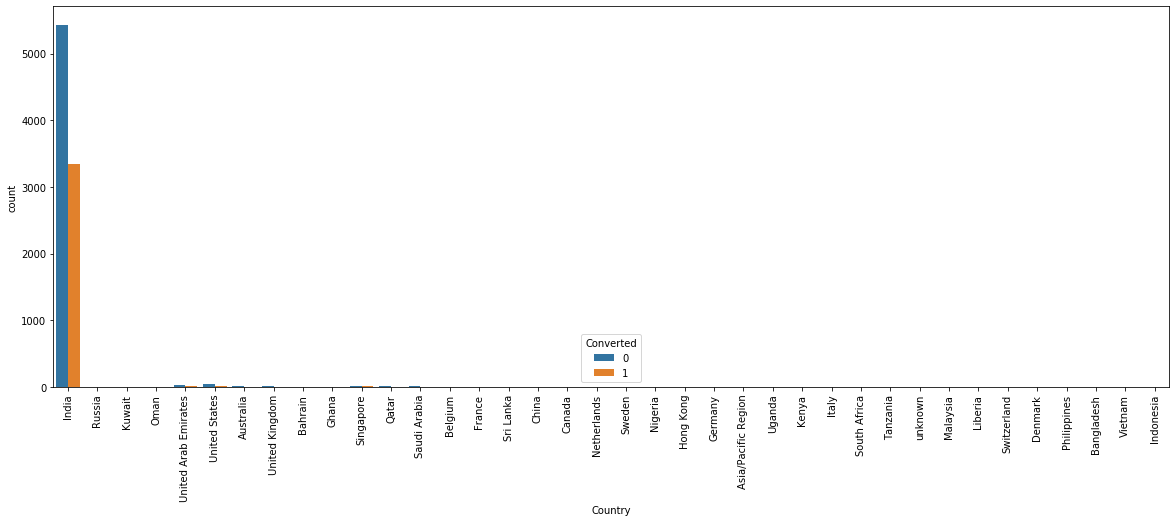

In [93]:
plot_cat_var(cat_var[5])

Observations for **Country** : <br>
Almost all of the responses are from India.

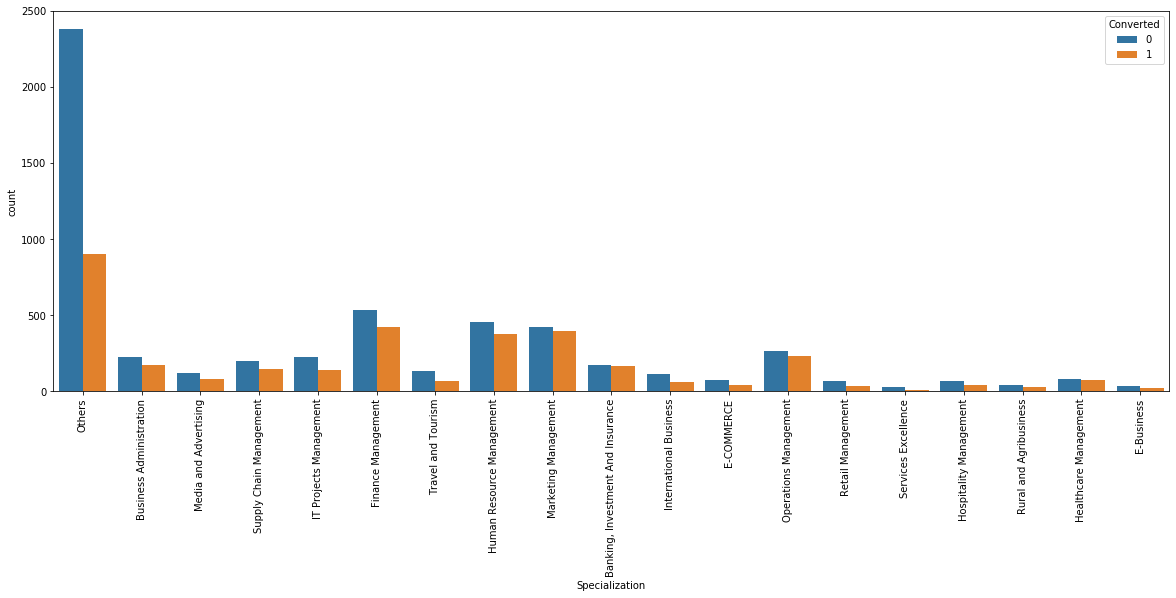

In [94]:
plot_cat_var(cat_var[6])

Observations for **Specialization** : <br>
Conversion rates are mostly similar across different specializations.

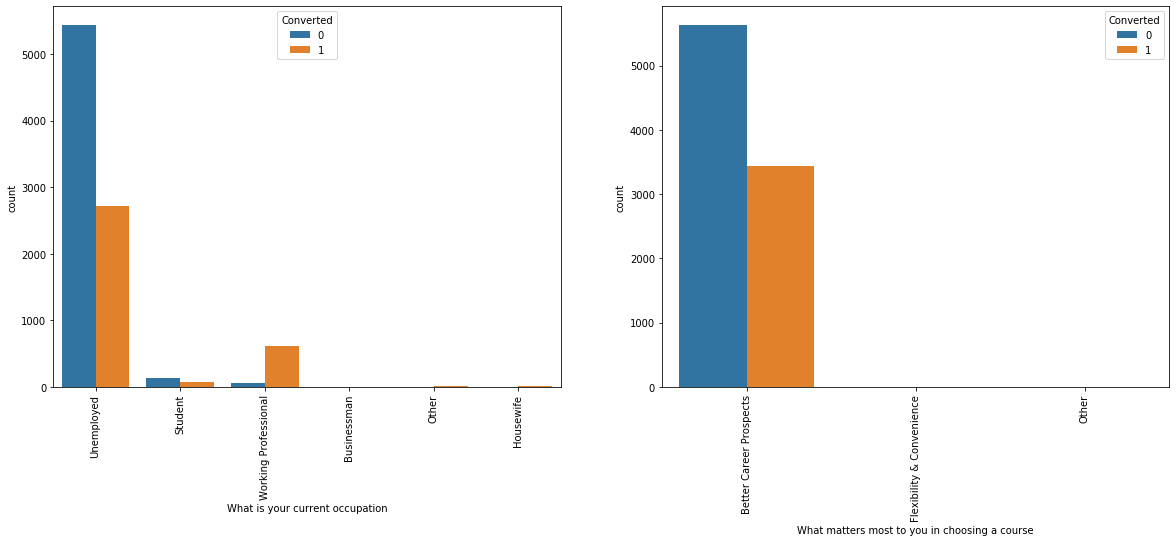

In [95]:
plot_cat_vars([cat_var[7],cat_var[8]])

Observations for **What is your current occupation** and **What matters most to you in choosing a course** : <br>
- The highest conversion rate is for 'Working Professional'. High number of leads are generated for 'Unemployed' but conversion rate is low.
- Variable 'What matters most to you in choosing a course' has only one category with significant count.

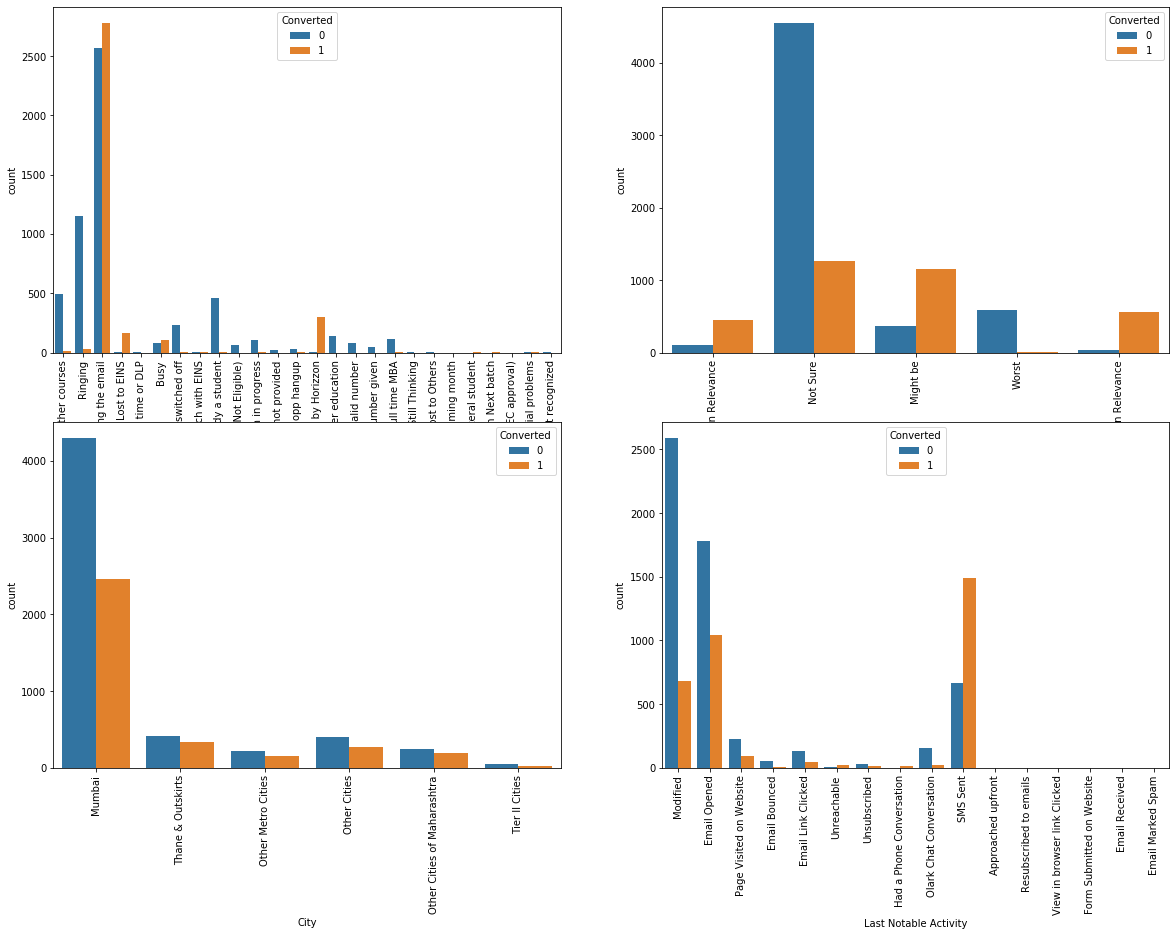

In [96]:
plot_cat_vars(cat_var[9:17])

Observations for **Search**, **Magazine**, **Newspaper Article**, **X Education Forums**, **Newspaper**, **Digital Advertisement**, **Through Recommendations**, and **Receive More Updates About Our Courses**: <br>
As all the above variables have most of the values as no, nothing meaningful can be inferred from these plots.

Based on the data visualization, we can drop the variables which are not significant for analysis and will not any information to the model.

In [102]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [103]:
df_leads = df_leads.drop(['Do Not Call'
                          ,'Country'
                          ,'What matters most to you in choosing a course'],1)

In [104]:
# Final dataframe
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [105]:
df_leads.shape

(9074, 14)

In [106]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Tags                             9074 non-null   object 
 11  Lead Quality                     9074 non-null   object 
 12  City                

In [107]:
df_leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,482.887481,2.265943
std,0.485053,2.780618,545.256560,1.790991
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,10.000000,2272.000000,6.000000


### Data Preparation

In [108]:
# Converting binary variable (Yes/No) to 0/1
df_leads['Do Not Email'] = df_leads['Do Not Email'].map({'Yes': 1, 'No': 0})

#### Dummy Variable creation
For categorical variables with multiple levels, we create dummy features (one-hot encoded).

In [109]:
# Categorical variables
cat_var = list(df_leads.columns[df_leads.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [110]:
# To create dummy variables and drop first ones
dummy = pd.get_dummies(df_leads[cat_var], drop_first=True)

# To add result to the original dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

# To drop the original variables
df_leads = df_leads.drop(cat_var,1)

In [111]:
df_leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Train-Test Split

In [112]:
# Importing required package
from sklearn.model_selection import train_test_split

In [113]:
X = df_leads.drop(['Converted'],axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [114]:
y = df_leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [115]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [116]:
# Importing required package
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()

In [118]:
# Recheck on numerical variables
num_var

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [119]:
# Applying scaler to all numerical columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [120]:
# To check the conversion rate
conversion = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
conversion

37.85541106458012

We have 37.85% conversion rate as observed before.

### Model Construction

#### Feature Selection using RFE

In [121]:
# To create an instance of Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [122]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [123]:
# To check output of RFE
rfe.support_

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [124]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 44),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 43),
 ('Lead Origin_Landing Page Submission', False, 22),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Facebook', False, 52),
 ('Lead Source_Google', False, 45),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Others', False, 61),
 ('Lead Source_Reference', False, 68),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Opened', False, 47),
 ('Last Activity_Others', False, 40),
 ('Last Activity_Page Visited on Website', False, 39),
 ('Last Activity_Unreachable', False, 20),
 ('Specialization_Business Administration', False, 67),
 ('Specialization_E-Business', False, 60),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_Finance Management', False, 42),
 ('Specialization_Healthcare Manag

In [125]:
# Features selected
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [126]:
# Features eliminated
X_train.columns[ ~ rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Ope

In [127]:
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const',1)    # As we don't need constant
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [129]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [130]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [131]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

<b><font color= green size =3>Model 1</font></b>

In [132]:
X1, logm1 = build_model(X_train[col], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.2
Date:                Tue, 16 Jan 2024   Deviance:                       3176.4
Time:                        22:43:35   Pearson chi2:                 3.57e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

`Tags_invalid number` has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

<b><font color= green size =3>Model 2</font></b>

In [133]:
col1 = col.drop('Tags_invalid number', 1)

X2, logm2 = build_model(X_train[col1], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1595.2
Date:                Tue, 16 Jan 2024   Deviance:                       3190.4
Time:                        22:44:15   Pearson chi2:                 3.49e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

`Tags_number not provided` has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

<b><font color= green size =3>Model 3</font></b>

In [134]:
col2 = col1.drop('Tags_number not provided', 1)

X3, logm3 = build_model(X_train[col2], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1598.7
Date:                Tue, 16 Jan 2024   Deviance:                       3197.4
Time:                        22:44:49   Pearson chi2:                 3.48e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

`Tags_wrong number given` has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

<b><font color= green size =3>Model 4</font></b>

In [135]:
col3 = col2.drop('Tags_wrong number given', 1)

X4, logm4 = build_model(X_train[col3], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.0
Date:                Tue, 16 Jan 2024   Deviance:                       3202.0
Time:                        22:44:53   Pearson chi2:                 3.48e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

All of the features have p-value close to zero i.e. they all seem significant.

We now have to check VIFs (Variance Inflation Factors) of features to check for multicollinearity.

In [136]:
check_VIF(X4)

,Features,VIF
9,Lead Quality_Not Sure,2.62
7,Tags_Will revert after reading the email,2.57
1,Lead Origin_Lead Add Form,1.58
6,Tags_Ringing,1.52
11,Last Notable Activity_SMS Sent,1.51
2,Lead Source_Welingak Website,1.34
4,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.10
3,Tags_Busy,1.10
8,Tags_switched off,1.10


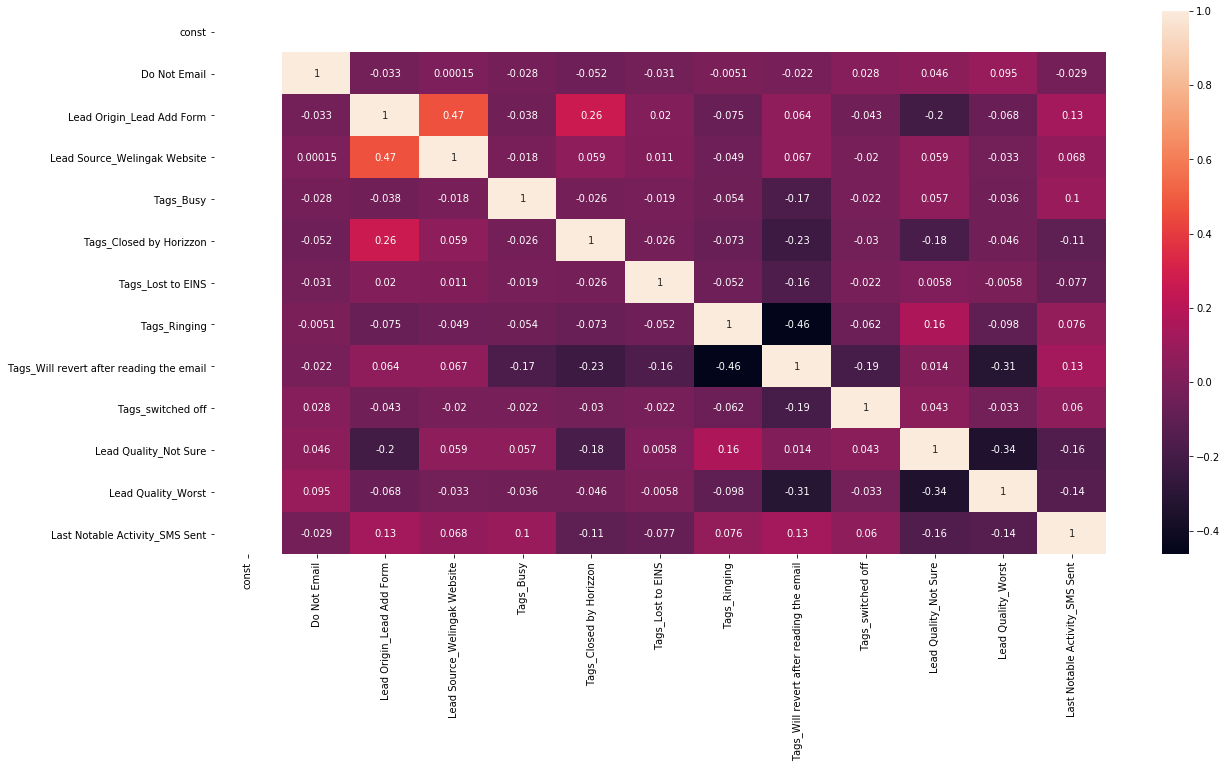

In [137]:
# To plot correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X4.corr(),annot = True)

From VIF values and heat maps, it can be seen that there is not much multicollinearity present. All variables have a good value of VIF. Therefore, it is proposed not to drop any more variables and further proceed with making predictions using this model only.

In [138]:
# To get predicted values on train set
y_train_pred_final = get_pred(X4,logm4)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.189946,3009,0
1,0,0.061006,1012,0
2,0,0.000707,9226,0
3,1,0.784007,4750,1
4,1,0.977108,7987,1


In [139]:
# Confusion Matrix and accuracy
confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3751  154]
 [ 357 2089]]
Training Accuracy:  0.9195402298850575


| Predicted/Actual | Not converted Leads | Converted Leads |
| --- | --- | --- |
| Not converted Leads | 3751 | 154 |
| Converted Leads | 357 | 2089 |

This is our **final model**:
1. All p-values are very close to zero.
2. VIFs for all features are very low. There is hardly any multicollinearity present.
3. Training accuracy of **91.95%** at a probability threshold of 0.05 is also very good.

### Metrics beyond simply Accuracy

In [140]:
other_metrics(confusion)

Sensitivity:  0.8540474243663123
Specificity:  0.9605633802816902
False postive rate - predicting the lead conversion when the lead does not convert:  0.03943661971830986
Positive predictive value:  0.9313419527418636
Negative predictive value:  0.9130963972736125


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity.
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [141]:
# Function to plot ROC
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [142]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

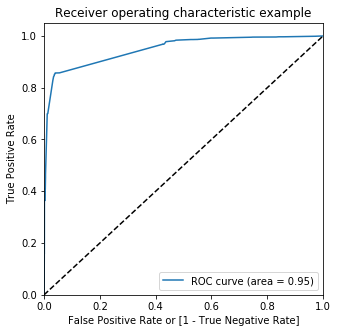

In [143]:
# To plot ROC
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [144]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.9488012517235278


Area under curve (auc) is approximately 0.95 which is very close to 1.

### Finding Optimal Cutoff Point
Optimal cutoff probability is the prob where we get balanced sensitivity and specificity.

In [145]:
# To create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1


In [146]:
# To calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.706503  0.981194  0.534443
0.2   0.2  0.911195  0.857318  0.944942
0.3   0.3  0.919383  0.856909  0.958515
0.4   0.4  0.920170  0.856092  0.960307
0.5   0.5  0.919540  0.854047  0.960563
0.6   0.6  0.920170  0.851594  0.963124
0.7   0.7  0.918753  0.843827  0.965685
0.8   0.8  0.876397  0.700327  0.986684
0.9   0.9  0.790742  0.464841  0.994878


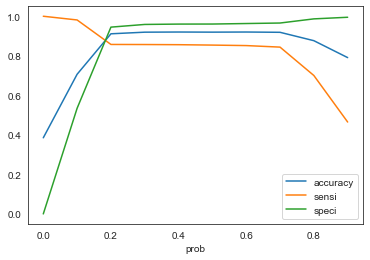

In [147]:
# To plot accuracy, sensitivity and specificity for various probabilities
sns.set_style('white')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, **0.2 is the optimum point to take as a cutoff probability**.

In [148]:
# Using 0.2 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [149]:
# Confusion matrix and Overall Accuracy
confusion2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3750  155]
 [ 352 2094]]
Training Accuracy:  0.9201700519603212


In [152]:
# Check for other metrics
other_metrics(confusion2)

Sensitivity:  0.8560915780866721
Specificity:  0.9603072983354674
False postive rate - predicting the lead conversion when the lead does not convert:  0.03969270166453265
Positive predictive value:  0.9310804802134282
Negative predictive value:  0.9141882008776206


##### Classification Report

In [153]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3905
           1       0.93      0.86      0.89      2446

    accuracy                           0.92      6351
   macro avg       0.92      0.91      0.91      6351
weighted avg       0.92      0.92      0.92      6351



### Precision and Recall

Precision = TP / TP + FP

In [154]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9313419527418636

Recall = TP / TP + FN

In [155]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8540474243663123

### Precision and Recall Tradeoff

In [157]:
from sklearn.metrics import precision_recall_curve

In [158]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [159]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

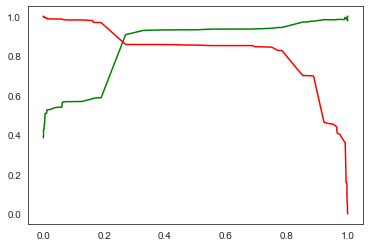

In [160]:
# To plot precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the curve above, **0.2 is the optimum point to take as a cutoff probability using Precision-Recall**. We can check our accuracy using this cutoff too.

In [161]:
# Using 0.25 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1,1
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [162]:
# Confusion matrix and overall accuracy
confusion3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[3690  215]
 [ 349 2097]]
Training Accuracy:  0.911195087387813


In [163]:
# Other metrics
other_metrics(confusion3)

Sensitivity:  0.857318070318888
Specificity:  0.9449423815620999
False postive rate - predicting the lead conversion when the lead does not convert:  0.05505761843790013
Positive predictive value:  0.9070069204152249
Negative predictive value:  0.9135924733845011


Accuracy and other metrics yield similar values for both the cutoffs. We'll use the cutoff of 0.2 as derived earlier for predictions on the test set.

### Making Predictions on the Test Set

In [164]:
# Feature transform on Test set
X_test[num_var] = scaler.fit_transform(X_test[num_var])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0.304501,-0.591008,0.998931,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1490,0,0.666261,1.894051,1.564920,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,-0.419021,-0.743117,-0.133048,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4216,0,-1.142542,-0.878732,-1.265027,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0,1.751544,-0.578179,2.130909,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
# To get final features
X_test_sm = X_test[col3]

In [166]:
# To add a constant
X_test_sm = sm.add_constant(X_test_sm)

In [167]:
# Making predictions
y_test_pred = logm4.predict(X_test_sm)

y_test_pred[:10]

3271    0.189946
1490    0.888099
7936    0.189946
4216    0.999300
3830    0.189946
1800    0.888099
6507    0.010841
4821    0.000376
4223    0.997563
4714    0.189946
dtype: float64

In [168]:
# To convert y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
3271,0.189946
1490,0.888099
7936,0.189946
4216,0.999300
3830,0.189946


In [169]:
# To convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [170]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [171]:
# To remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [172]:
# To append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.189946
1,1,1490,0.888099
2,0,7936,0.189946
3,1,4216,0.999300
4,0,3830,0.189946


In [173]:
# To Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,3271,0.189946
1,1,1490,0.888099
2,0,7936,0.189946
3,1,4216,0.999300
4,0,3830,0.189946


In [174]:
# To put the threshold of 0.2 as derived
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.189946,0
1,1,1490,0.888099,1
2,0,7936,0.189946,0
3,1,4216,0.999300,1
4,0,3830,0.189946,0


In [175]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))

Area under curve:  0.9388647090311768


In [176]:
# Confusion matrix and overall accuracy
confusion_test = conf_mat(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1640   94]
 [ 157  832]]
Training Accuracy:  0.9078222548659567


| Predicted/Actual | Not converted Leads | Converted Leads |
| --- | --- | --- |
| Not converted Leads | 1640 | 94 |
| Converted Leads | 157 | 832 |

In [178]:
# Other metrics
other_metrics(confusion_test)

Sensitivity:  0.8412537917087968
Specificity:  0.9457900807381776
False postive rate - predicting the lead conversion when the lead does not convert:  0.05420991926182238
Positive predictive value:  0.8984881209503239
Negative predictive value:  0.9126321647189761


##### Classification Report

In [179]:
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1734
           1       0.90      0.84      0.87       989

    accuracy                           0.91      2723
   macro avg       0.91      0.89      0.90      2723
weighted avg       0.91      0.91      0.91      2723



### Determining Feature Importance

In [180]:
pd.options.display.float_format = '{:.2f}'.format
new_params = logm4.params[1:]
new_params

Do Not Email                               -1.28
Lead Origin_Lead Add Form                   1.20
Lead Source_Welingak Website                3.28
Tags_Busy                                   3.80
Tags_Closed by Horizzon                     7.98
Tags_Lost to EINS                           9.19
Tags_Ringing                               -1.81
Tags_Will revert after reading the email    3.99
Tags_switched off                          -2.45
Lead Quality_Not Sure                      -3.52
Lead Quality_Worst                         -3.91
Last Notable Activity_SMS Sent              2.74
dtype: float64

In [181]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                               -13.96
Lead Origin_Lead Add Form                   13.09
Lead Source_Welingak Website                35.70
Tags_Busy                                   41.37
Tags_Closed by Horizzon                     86.78
Tags_Lost to EINS                          100.00
Tags_Ringing                               -19.71
Tags_Will revert after reading the email    43.40
Tags_switched off                          -26.60
Lead Quality_Not Sure                      -38.30
Lead Quality_Worst                         -42.53
Last Notable Activity_SMS Sent              29.79
dtype: float64

In [182]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                10
Lead Origin_Lead Add Form                    9
Lead Source_Welingak Website                 8
Tags_Busy                                    6
Tags_Closed by Horizzon                      0
Tags_Lost to EINS                            1
Tags_Ringing                                11
Tags_Will revert after reading the email     2
Tags_switched off                            3
Lead Quality_Not Sure                        7
Lead Quality_Worst                           4
Last Notable Activity_SMS Sent               5
dtype: int64

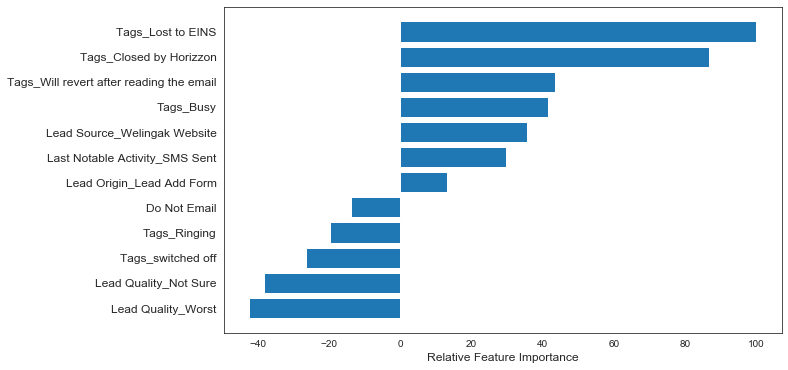

In [183]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col3].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

-----------

### Conclusion

After trying out saveral models, our final model has following characteristics:
1. All p-values are very close to zero.
2. VIFs for all features are very low. There is hardly any multicollinearity present.
3. The overall testing accuracy of **91%** at a probability threshold of 0.05 is also very good.

The **optimal threshold** for the model is **0.20** which is calculated based on tradeoff between sensitivity, specificity and accuracy. According to business needs, this threshold can be changed to increase or decrease a specific metric. <br>

High sensitivity ensures that most of the leads who are likely to convert are correctly predicted, while high specificity ensures that most of the leads who are not likely to convert are correctly predicted.

**Features** were selected as the most significant in predicting the conversion:
- Features having **positive impact** on conversion probability in **decreasing order** of impact:

|Features with Positive Coefficient Values|
|-------------|
|Tags_Lost to EINS|
|Tags_Closed by Horizzon|
|Tags_Will revert after reading the email|
|Tags_Busy|
|Lead Source_Welingak Website|
|Last Notable Activity_SMS Sent|
|Lead Origin_Lead Add Form|

- Features having **negative impact** on conversion probability in **decreasing order** of impact:

|Features with Negative Coefficient Values|
|----------|
|Lead Quality_Worst|
|Lead Quality_Not Sure|
|Tags_switched off|
|Tags_Ringing|
|Do Not Email|

-----------